# Developer Student Club (DSC) - Beginner Machine Learning Track 

## Regression
- Is a problem to predict a real value based on continuous values
- Examples:
    * Predict house price
    * Predict the sale of products in the future based on past buying behaviour
    * Trend analysis of stock market price

## **Linear Regression**
* A Supervised Learning algorithm that examines the linear relationship between features and label. 
* E.g. house price and house properties (e.g. room numbers, house area, year, etc.)

##### Simple Linear Regression
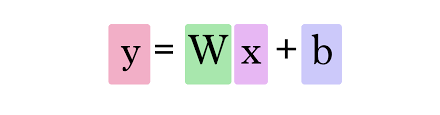

##### that
### - **w, b** are weight, bias
### - **x, y** are input, output

![Multivariable Linear Regression](https://miro.medium.com/max/3444/1*uLHXR8LKGDucpwUYHx3VaQ.png)

### Boston House Price Dataset

![alt text](https://cdn.vox-cdn.com/thumbor/bJH8TW8h_0iVsX_DvMA836l0EbQ=/0x0:1024x683/1200x800/filters:focal(431x261:593x423)/cdn.vox-cdn.com/uploads/chorus_image/image/56556535/r1.0.jpg)



1. CRIM: This column represents per capita crime rate by town
2. ZN: This column represents the proportion of residential land zoned for lots larger than 25,000 sq.ft.
3. INDUS: This column represents the proportion of non-retail business acres per town.
4. CHAS: This column represents the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
NOX: This column represents the concentration of the nitric oxide (parts per 10 million)
5. RM: This column represents the average number of rooms per dwelling
6. AGE: This column represents the proportion of owner-occupied units built prior to 1940
7. DIS: This column represents the weighted distances to five Boston employment centers
8. RAD: This column represents the index of accessibility to radial highways
9. TAX: This column represents the full-value property-tax rate per $10,000

10. PTRATIO: This column represents the pupil-teacher ratio by town
11. B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
12. LSTAT: This is the percentage lower status of the population
13. MEDV: This is the median value of owner-occupied homes in $1000s



##### Import dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

##### Load data

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()

In [6]:
bos = pd.DataFrame(boston.data)
bos['MEDV'] = boston.target
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
bos.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The variable MEDV indicates the prices of the houses and is the target variable. The rest of the variables are the predictors based on which we will predict the value of the house.

In the above result, we can see that the target variable ‘MEDV’ is missing from the data. We will create a new column of target values and add them to the dataframe.

### Explanatory Data Analysis (EDA)
**Exploratory Data Analysis is a very important step before training the model. We will use some visualizations to understand the relationship of the target variable with other variables.**

In [9]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


##### Inspect statistics of Boston House Price dataset

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### Check missing values

In [12]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**There is no null value present in the dataset.**

### Inspecting by visualization

###### Plot distribution of MEDV

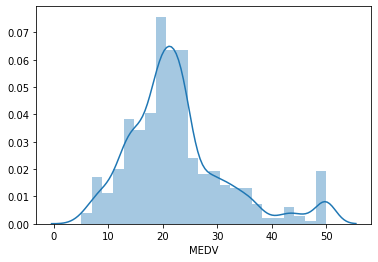

In [13]:
sns.distplot(bos['MEDV'])
plt.show()

**==> From the above output we can see that the values of MEDV is normally distributed with some of the outliers.**

###### Visualize the pairplot which shows the relationships between all the features present in the dataset.

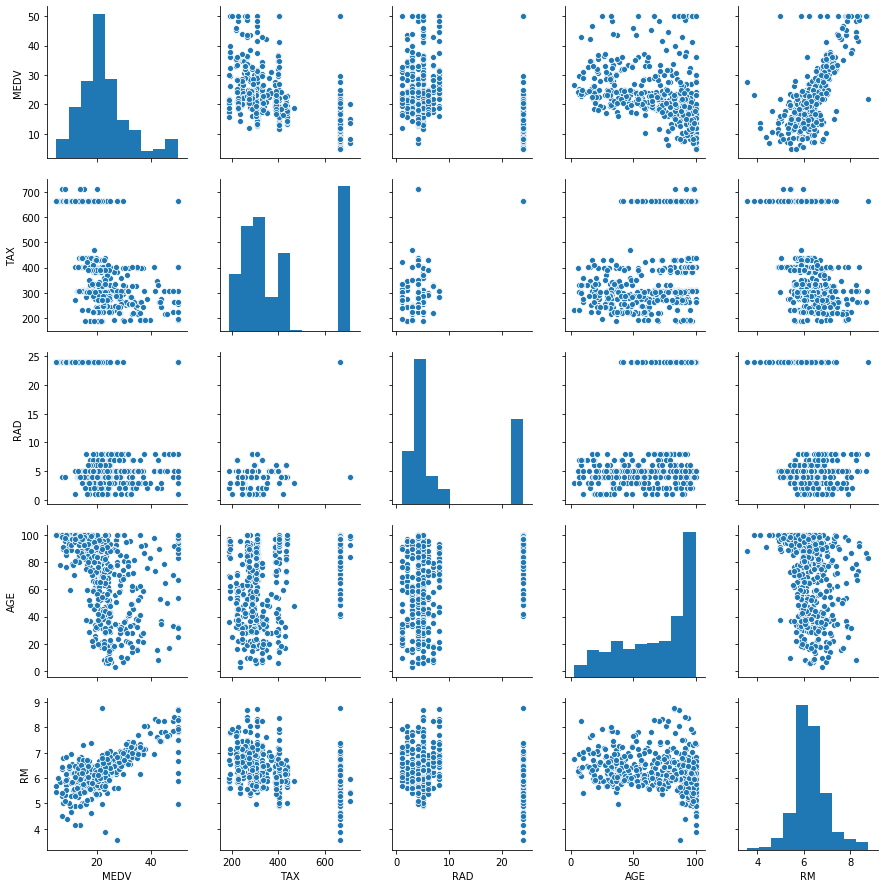

In [22]:
sns.pairplot(bos[['MEDV', 'TAX', 'RAD', 'AGE', 'RM']])

###### Plot heatmap

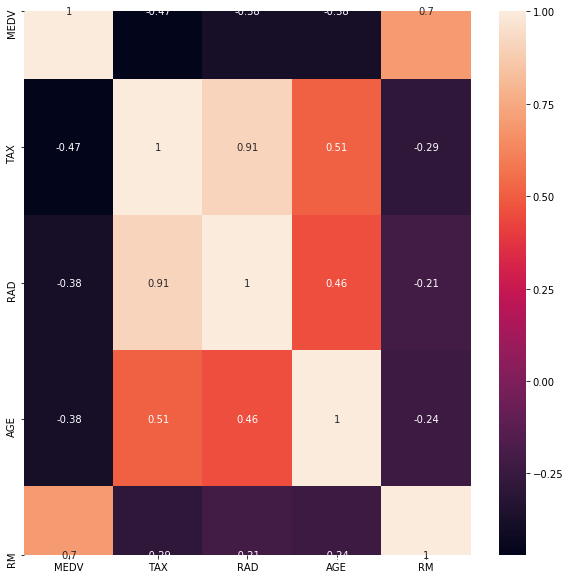

In [23]:
plt.figure(figsize = (10, 10))
corr_mat = bos[['MEDV', 'TAX', 'RAD', 'AGE', 'RM']].corr().round(2)
sns.heatmap(data=corr_mat, annot=True)

**==> From the above two graphs, we can clearly see that the feature RM has a positive correlation with MEDV.**

##### Based on the above observations we will plot an lmplot between RM and MEDV to see the relationship between the two more clearly.**

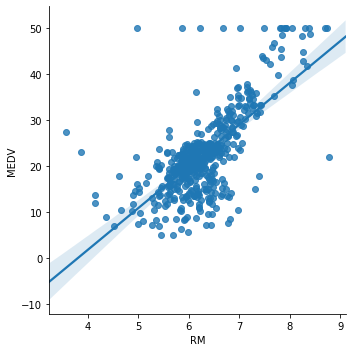

In [16]:
sns.lmplot(x = 'RM', y = 'MEDV', data = bos)

### Train Linear Regression model

In [37]:
# select features you want to train
X = bos[['TAX', 'RAD', 'AGE', 'RM']]
y = bos['MEDV']

##### Split the dataset into training (80%) and test (20%) data. 

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

### Training the Model

We will now train our model using the LinearRegression function from the sklearn library.

In [39]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Extra algorithms
Link: https://github.com/DSC-UTDallas/explore-ml/blob/beginner/beginner_track/regression/scikitlearn.ipynb

### Make predictions

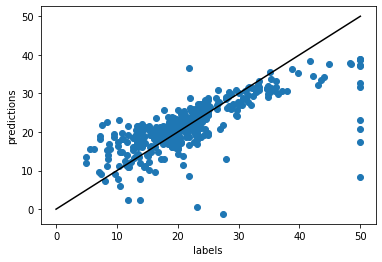

In [40]:
prediction = lm.predict(X_train)
plt.scatter(y_train, prediction)
plt.plot([0,50], [0, 50], 'k-')
plt.xlabel('labels')
plt.ylabel('predictions')
plt.show()

### Training steps

##### 1. Linear Formula 
**y = w*x + b** that 
* **x, y** are input and output
* **w, b** are weight and bias that are initialized randomly. **GOAL** is to optimize **w, b** to minimize **LOSS**

### ==> Output of Univariate Linear Regression: y = w*x + b. That's it

##### 2. Cost (Loss) functions:
* **MSE (Mean Squared Error)**
* **MAE (Mean Absolute Error)**
![alt text](https://econbrowser.com/wp-content/uploads/2019/07/msemae.png)

#### Steps to compute MSE (Mean-Squared-Error)
Given labels = [1, 2, 3, 4] and predictions = [2, 10, 2.4, 3.8]

##### - Error 
Calculate **Error** = [1 - 2, 2 - 10, 3 - 2.4, 4 - 3.8] = **[-1, -8, 0.6, 0.2]**

#### - Squared
Compute **Squared** = [(-1)^2, (-8)^2, 0.6^2, 0.2^2] = **[1, 64, 0.36, 0.04]**

#### - Mean
Compute **Mean** = sum(Squared) / n = (1 + 64 + 0.36 + 0.04) / 4 = **32.7**


##### 3. Update weights and optimize
**==>** With calculated loss, update weight **new_w = old_w +/- ɑ * loss [*]**


**==>** Apply Calculus, **compute derivative of [*] and find old_w that new_w is minimized**.

* Repeat this process over iterations, we got **Gradient Descent** that **cost** for each iteration will move to the **global minimum**

![alt text](https://ml-cheatsheet.readthedocs.io/en/latest/_images/gradient_descent_demystified.png) 

### Check Errors

In [41]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Training accuracy")
print('MAE', metrics.mean_absolute_error(y_train, prediction))
print('MSE', metrics.mean_squared_error(y_train, prediction))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_train, prediction)))
print('R squared error', r2_score(y_train, prediction))

Training accuracy
MAE 3.8409685099866575
MSE 35.255560175706464
RMSE 5.937639276320722
R squared error 0.5419026611745101


### Testing model

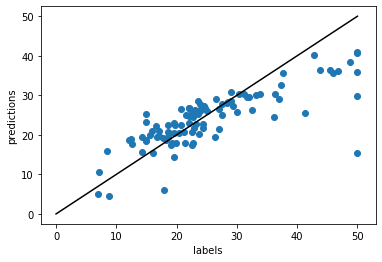

In [42]:
prediction = lm.predict(X_test)
plt.plot([0,50], [0, 50], 'k-')
plt.scatter(y_test, prediction)
plt.xlabel('labels')
plt.ylabel('predictions')
plt.show()

##### Plotting the data frame for the actual and predicted value and plotting a graph for the same.

In [43]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted':prediction})
df2 = df1.head(10)
df2

,Actual,Predicted
305,28.4,27.963577
193,31.1,30.225168
65,23.5,25.275219
349,26.6,29.046234
151,19.6,14.410409
433,14.3,19.441739
161,50.0,29.782315
129,14.3,15.691890
269,20.7,22.519977
226,37.6,35.683277


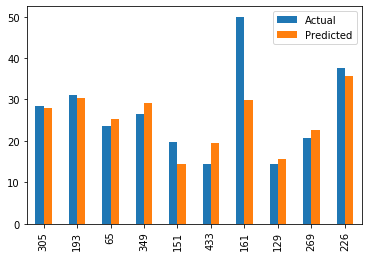

In [44]:
df2.plot(kind = 'bar')

From the above graph, we can see that there is not much difference between the actual and predicted values,  Hence our predicted model seems to work pretty well.

#### Model Evaluation

We will now evaluate the model using the metrics and r2_score function from sklearn library.

Here we will evaluate the Mean Absolute Error, Mean Squared Error, Root Mean Squared Error and R-squared value.

The value of R-square ranges from 0 to 1 where value ‘1’ ( or near to 1) indicates predictor perfectly accounts for all the variation in Y.

In [45]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE', metrics.mean_absolute_error(y_test, prediction))
print('MSE', metrics.mean_squared_error(y_test, prediction))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R squared error', r2_score(y_test, prediction))

MAE 4.427223771981926
MSE 41.2569827474618
RMSE 6.423159872481908
R squared error 0.6055011508764698


#### Overfitting & Underfitting
---
**Overfitting** If the model does really great on the training data but poorly on the testing data, this means you may have overfitted.
  * **Reasons** : 
      * Mostly due to the limited dataset that the model cannot be trained to be generalized.
      * In this notebook, due to the limited Iris dataset, the logistic model in this notebook may easily encouter **overfitting** when it makes predictions against unseen data.
  * **Solutions** : 
      * Simplify ML algorithms/models
      * Add regularization

**Underfitting** is when your model does not capture all the detail of the data while overfitting is when your model captures too much detail and ends up showcasing random noise as well.
  * **Reason** : happen due to 
      * The simplicity of Machine Learning algorithms
      * Too few data features. 
  * **Solutions** : 
      * Build more complex ML algorithms/models
      * Add model parameters and data features.

  ![Overfitting & Underfitting](https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png)

In our case, our testing model did have a slighly higher RMSE so some noise may have been picked up but it is only a slight increase. Some ways to help reduce overfitting is cross-validation, training with more data, or removing features.

**Feature Engineering**
![alt text](https://venturebeat.com/wp-content/uploads/2018/07/feature_engineering.jpg?resize=680%2C198&strip=all)
Feature Engineering is when you change aspects of your features to try and improve accuracy. You try to change raw data into features that better represent the data and can uncover hidden patterns. This includes normalizing columns, turning features into factors, or reducing the complexity of features (etc. changing percents 0-100 to a factor of 0-1, being over and under 50).

##### Normalizing numerical features
---
MinMaxScaler - a class in **scikit-learn** package to normalize samples into range 0-1 by finiding Max and Min values in every numerical feature.

StandardScaler - a class in **scikit-learn** package to standardize sampels by substracting Mean from sample and divide by Standard-Deviation

In [60]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [245]:
bos_df = bos.copy() # make a copy of boston df

##### Normalize samples to range 0-1

In [188]:
mm_scaler = MinMaxScaler().fit(bos_df[['CRIM', 'ZN', 'INDUS', 'NOX']])
bos_df[['CRIM', 'ZN', 'INDUS', 'NOX']] = mm_scaler.transform(bos_df[['CRIM', 'ZN', 'INDUS', 'NOX']])

In [189]:
bos_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.002812,0.000000,0.338343,0.000000,0.314815,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,0.041258,0.125000,0.646628,0.000000,0.491770,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### Standardize samples

In [251]:
sd_scaler = StandardScaler()
sd_scaler.fit(bos_df[['RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])
bos_df[['RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']] = sd_scaler.transform(bos_df[['RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])

In [252]:
bos_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,-1.088282e-16,-1.474446e-16,-8.425408e-17,-1.123388e-16,0.000000,-4.212704e-16,-7.442444e-16,-3.089316e-16,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990,-2.707379e+00,-3.907193e+00,-1.531127e+00,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-0.767576,-4.880391e-01,2.050715e-01,-7.994200e-01,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-0.464673,2.748590e-01,3.811865e-01,-1.812536e-01,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926,8.065758e-01,4.336510e-01,6.030188e-01,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194,1.638828e+00,4.410519e-01,3.548771e+00,50.000000


##### Select features for training (not all features)

In [254]:
X = bos_df[['CRIM', 'ZN', 'INDUS', 'NOX', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']]
y = bos_df['MEDV']

##### Split data into Train and Test subsets

In [255]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

##### Define and train model

In [256]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Make Training predictions

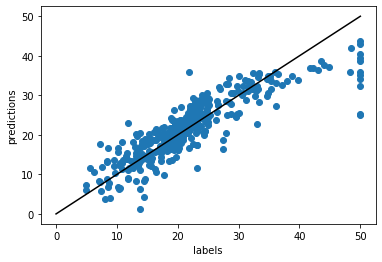

In [257]:
prediction = lm.predict(X_train)
plt.scatter(y_train, prediction)
plt.plot([0,50], [0, 50], 'k-')
plt.xlabel('labels')
plt.ylabel('predictions')
plt.show()

In [258]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Training accuracy")
print('MAE', metrics.mean_absolute_error(y_train, prediction))
print('MSE', metrics.mean_squared_error(y_train, prediction))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_train, prediction)))
print('R squared error', r2_score(y_train, prediction))

Training accuracy
MAE 3.074171477363067
MSE 19.293058218495393
RMSE 4.39238639221271
R squared error 0.7493133399767096


##### Make Testing predictions

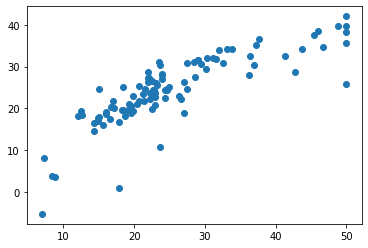

In [260]:
prediction = lm.predict(X_test)
plt.scatter(y_test, prediction)

In [261]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE', metrics.mean_absolute_error(y_test, prediction))
print('MSE', metrics.mean_squared_error(y_test, prediction))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R squared error', r2_score(y_test, prediction))

MAE 4.0379433130361795
MSE 33.870130316137605
RMSE 5.81980500671093
R squared error 0.6761341586424587
